In [2]:
# Importing all the essential Python libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
# Importing Stock market data from the Internet

from pandas.io.data import DataReader

/home/srikanth/anaconda3/lib/python3.5/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
# Importing datetime for setting start and end date of the stock market dataset

from datetime import datetime

In [5]:
# Setting the Start and End date for Stock Market Analysis

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [6]:
# Importing ExxonMobil Stock Prices

XOM = DataReader('XOM','yahoo',start,end)

In [7]:
# Some Basic info about the ExxonMobil Stock

XOM.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,83.037012,83.712311,82.324383,83.017331,14082761.354582,81.571099
std,5.658070,5.534100,5.681725,5.617766,4790701.213599,4.890981
min,67.989998,71.379997,66.550003,68.709999,4155600.000000,68.116198
25%,79.029999,79.729999,78.294998,79.235000,10705500.000000,78.545283
50%,83.809998,84.680000,83.269997,83.930000,13451900.000000,82.117582
75%,87.175003,87.610000,86.655003,87.015000,16100050.000000,85.151937
max,93.330002,93.860001,92.889999,93.370003,36083500.000000,90.952771


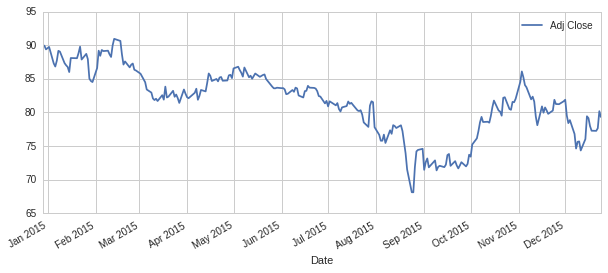

In [8]:
# Plotting Adjusted Closing price for ExxonMobil Stock

XOM['Adj Close'].plot(legend=True,figsize=(10,4))

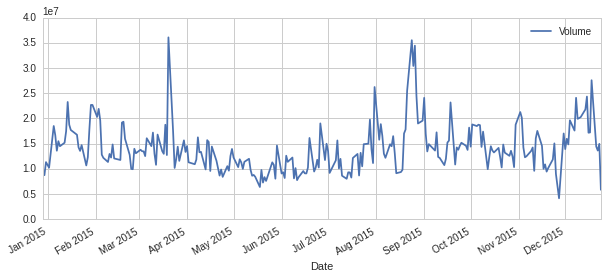

In [9]:
# Plotting the total volume of stock being traded each day

XOM['Volume'].plot(legend=True,figsize=(10,4))

In [10]:
# Calculating Moving average for 10, 20 and 50 days of the stock price

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    XOM[column_name] = pd.rolling_mean(XOM['Adj Close'],ma)

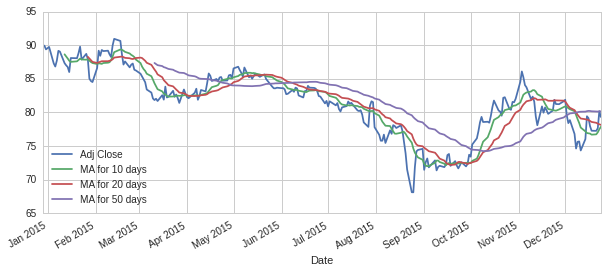

In [11]:
# Plotting the moving averages

XOM[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

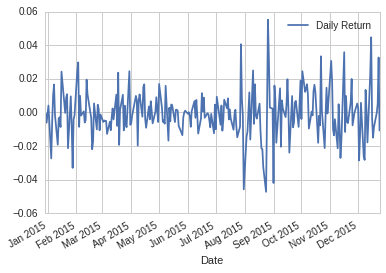

In [12]:
# Plotting Daily returns as a function of Percent change in Adjusted Close value

XOM['Daily Return'] = XOM['Adj Close'].pct_change()

XOM['Daily Return'].plot(legend=True)

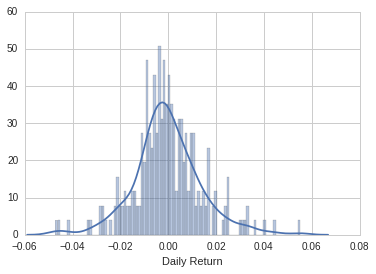

In [13]:
# Plotting the average daily returns of the stock

sns.distplot(XOM['Daily Return'].dropna(),bins=100)

/home/srikanth/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


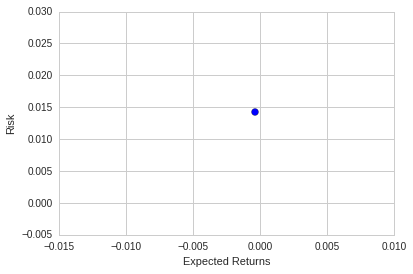

In [14]:
# Risk Analysis --  Comparing the Risk vs Expected returns

rets = XOM['Daily Return'].dropna()

area = np.pi*15

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

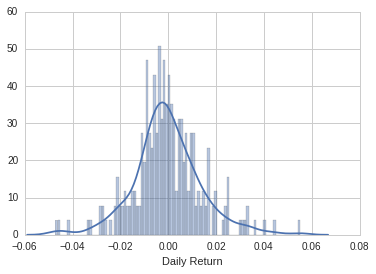

In [15]:
# Visualizing the Value at Risk

sns.distplot(XOM['Daily Return'].dropna(),bins=100)

In [16]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

XOM['Daily Return'].quantile(0.05)

-0.021623906559061233

In [17]:
## Monte Carlo Simulation

days = 365

dt = 1/days

mu = rets.mean()

sigma = rets.std()

In [18]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

In [19]:
XOM.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2014-12-29,93.330002,93.860001,92.889999,93.070000,9892100,89.983230,NaN,NaN,NaN,NaN
2014-12-30,92.769997,93.389999,92.510002,93.019997,8743400,89.934885,NaN,NaN,NaN,-0.000537
2014-12-31,92.419998,93.129997,92.059998,92.449997,11337200,89.383790,NaN,NaN,NaN,-0.006128
2015-01-02,92.250000,93.050003,91.809998,92.830002,10220400,89.751192,NaN,NaN,NaN,0.004110
2015-01-05,92.099998,92.400002,89.500000,90.290001,18502400,87.295433,NaN,NaN,NaN,-0.027362


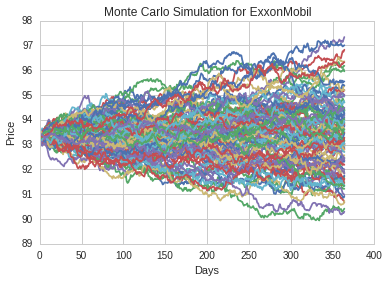

In [20]:
# Running the Monte Carlo simulation a hundred times

start_price = 93.330002

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for ExxonMobil')

In [21]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
# 1 percent impirical quantile or 99% Confidence Interval

q = np.percentile(simulations,1)

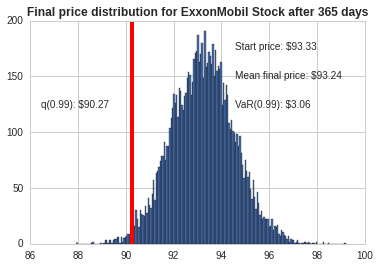

In [22]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for ExxonMobil Stock after %s days" % days, weight='bold');